# Bitterroot national park, sleeping child burn 1961

- year of fire: 1961
- first year of measurement: 1962
- Whats the minimum DBH measured? --> 0
- 8 transects with 10 plots each
- 1 plot = 0.04 acre
- basing these calculations on table 1 not figure 1, for figure see


        old_notebooks/
        
## Species
Snag species were not recorded , but lodgepole pine ( Pinus contorta ) was the dom inant tree species . In general , stems under 3 inches in diameter were subalpine fir ( Abies lasiocarpa ) and all others were lodgepole pine with the exception that the few very large snags ( over 12 inches ) were Douglas - fir ( Pseudotsuga menziesii ) and Engel mann spruce ( Picea engelmannii ) . 

### Methods for derving mean of DBH classes
If the mean DBH of DBH classes was not given, we used the minimum measured DBH to constrain the lower boundary of the smallest DBH class. If the maximum DBH measured was not given, we conservatively assumed that the mean of the largest DBH class was equal to its minimum DBH included.        

### X values
If survey, they are already converted to the correct interval.

![title](snag_fall_rates/Lyon1977AttritionMontana_tab1.png)

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from scipy.interpolate import interp1d
import sys

sys.path.append('/Users/antje/Update_PIK/')

from classes import boundaries as bd
from classes import functions as fcy
from classes import snag_MTF_func as sg

plot_setup = bd.plot_setup()
params = {'mathtext.default':'regular'}
plt.rcParams.update(params)

%matplotlib inline
%config Completer.use_jedi = False 

In [3]:
# --- Converting DBH classes from inches to to cm
print(3*sg.inch_to_cm, 8*sg.inch_to_cm, 12*sg.inch_to_cm) # DBH class boundaries

# What is the mean difference between the DBH classes in cm?
print('Mean difference between DBH classes (cm):', np.mean(np.diff([0, 7.6, 20.3, 30])))

# Deriving DBH class means, as the mean between class boundaries
DBH_class_cm = np.array([np.mean([0,2.9])  * sg.inch_to_cm, # could also be zero rounded mean is the same
                         np.mean([3,7.9])  * sg.inch_to_cm, 
                         np.mean([8,11.9]) * sg.inch_to_cm,
                         12 *sg.inch_to_cm]).round()
DBH_class_cm[-1] = DBH_class_cm[-2] + np.mean(np.diff([0, 7.6, 20.3, 30]))
print('DBH classes (cm):', DBH_class_cm)

7.62 20.32 30.48
Mean difference between DBH classes (cm): 10.0
DBH classes (cm): [ 4. 14. 25. 35.]


In [4]:
DBH_class_cm

array([ 4., 14., 25., 35.])

In [5]:
##############
#   Import   #
##############

save = False # put to FALSE while WIP!

reference = 'Lyon1977AttritionMontana'
ID = 18

species = [ 
           ['Lodgehole pine', 'Pinus contorta'], # dominant species
           ['Subalpine fir', 'Abies lasiocarpa'],
           ['Douglas fir', 'Pseudotsuga menziesii'],
           ['Engelmann spruce', 'Picea engelmannii']
          ]

DBH_minimum        = 0
DBH_classes        = ['<7.6', '7.6-20.2', '20.3-30', '>=30'] # Table 1, [cm]
DBH_class_min      = np.array([0, 7.6, 20.3, 30])
DBH_class_max      = np.array([7.5, 20.2, 29.9, np.nan])
DBH_classes_mean   = np.round((DBH_class_min + DBH_class_max) / 2)
# Adding half of the regular interval to derive mean DBH of the largest class
DBH_classes_mean   = np.append(DBH_classes_mean[:-1], 30+np.round(np.mean(np.diff(DBH_classes_mean[:-1])))/2)

# Table 2 - start year of measurements 1962
DBH_ntrees         = np.array([266, 159, 64, 7]) # ntrees / acre
species_mean_DBH   = np.sum(DBH_classes_mean * DBH_ntrees) / np.sum(DBH_ntrees) # [cm] weighted mean

 
country            = 'USA'
region             = 'Montana'
biome              = 'Temperate'
site_name          = 'Bitterroot National Forest; Sleeping Child Burn'
mean_tC            = np.nan           # degree C
mean_precip_mm     = np.nan 
y_coords           = 46.106760        # Location of the sleeping child creek on google maps
x_coords           = -114.012902   
tlag               = 1                # n years until sangfall starts
mean_age           = np.nan
elevation          = 1500 # [m] - from google maps terrain function at location which was shown in feet (5000feet)
min_height         = np.nan
min_diam           = 0
max_diam           = np.nan
diameter_classes   = np.nan
n_plots            = 80
plot_size          = 0.04 * sg.acre_to_ha # hectare
DBH_ntrees         = DBH_ntrees * (plot_size*80) # Total trees measured
management         = np.nan
mortality_cause    = 'Fire'

species_ntrees     = np.nan


species_abundance_prc = np.nan
age_classes           = np.nan
tree_share_to_snag    = np.nan


tree_density       = np.nan  # trees / ha
speciesDOM         = 'Pinus contorta'# scientific only
speciesDOM_prc     = np.nan # dominant tree species percentage of total

# Load data types
dt = pd.read_excel("snag_fall_rates/201210_data_types_MTF_literature.xlsx", index_col=None, 
                   header=[0,1])['Data types']
method_snag_field_measurement = dt.columns[dt.apply(lambda col: 
                                                    col.str.contains(reference, na=False), axis=1).any()].item()
ntree_Total                        = DBH_ntrees.sum()  # total trees measured
Remeasurement_interval_avg         = 1 # years
survey_duration_total              = 1976 - 1962 + 1 # years
survey_start_yr                    = 1962
survey_end_yr                      = 1976
TSD_determination_method           = 'Observation' #cf. Method_snagfall_measurement -> Dendrochronology, Chronosequence, None if mean fall /year
Model_type_fracRemain_snag         = 'Number of snags remaining at next meausurement, possible because it is a burned site' # ‘negative exponential…
Model_type_fracRemain_snag_sigCov  = np.nan # significant (p<0.05) co-variats
Model_type_fracRemain_snag_nsigCov = np.nan # not significant co-variats







# Path to data
path = '../data/snag_fall_rates/'

lyon = pd.read_csv(path+reference+'_fig1.csv', 
            header=[0,1]
                     )

[ 0.5  1.5  3.5  6.5  9.  12.5]
[ 0.   0.5  1.5  3.5  6.5  9.  12.5]
[[266 266 265  96  41  28   4]
 [159 159 156 124 103  85  50]
 [ 64  64  62  40  36  24  19]
 [  7   7   7   7   6   4   3]]


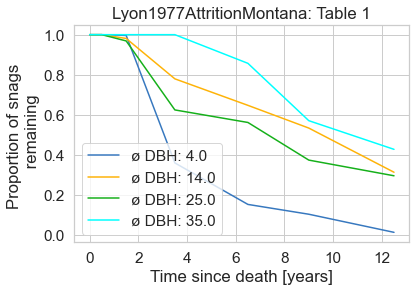

In [6]:
# Derive x values for table 1
x = np.array([1961, 1962, 1963, 1966, 1969, 1971, 1976])
x = np.cumsum(np.append(0,np.diff(x)))
x1 = x[:-1] + (x[1:] - x[:-1]) / 2
x2 = np.append(0,x1)
print(x1)
print(x2)

    
# Derive y values for table 1
ntrees = np.array([[266, 266, 265, 96,41, 28, 4], # <3 inches
                   [159,159, 156, 124,103,85,50],# 3≤8 inches
                   [64,64,62,40,36,24,19], # 8≤12 inches
                   [7,7,7,7,6,4,3]]) # ≥12 inces

print(ntrees)


# convert table to proportions of n trees standing
tab1 = pd.DataFrame(ntrees.T, index = x2).div(ntrees.T[0,:]) # I can do this because it is a burn!
tab1.columns = ['ø DBH: '+ str(i) for i in DBH_class_cm]

tab1.plot()
plt.xlabel('Time since death [years]')
plt.ylabel('Proportion of snags \n remaining')
plt.title(reference+': Table 1')
plt.show()

# Cmass whole

In [7]:
DOMspecies_DBH_class = ['Abies lasiocarpa','Pinus contorta','Pinus contorta','Pinus contorta']

cmass_whole = []
for d in range(len(DBH_classes_mean)):
    cmass_whole.append(sg.StemCarbon_whole(DOMspecies_DBH_class[d], DBH_classes_mean[d])*DBH_ntrees[d])

Abies lasiocarpa not included in TRY stem carbon dataset! Using 50% carbon content.


In [8]:
cmass_whole

[442.2399179402332, 5037.451259249143, 8460.734087166089, 2120.1000981320944]

# Save the input data

In [9]:
# Raw data
x = [tab1.index.tolist()] * len(tab1.columns)
y = tab1.values.T.tolist()

DBH_class = DBH_classes
DBH_min = DBH_class_min
DBH_max = DBH_class_max
DBH_mean = DBH_classes_mean.tolist()
ntree_DBH = DBH_ntrees.tolist()
cmass_whole = cmass_whole
cmass_ts = [np.nan] * len(x)
species_list = [species[0][0]] * len(tab1.columns)
species_scientific_list = [species[0][1]] * len(tab1.columns)
site_name_list = [site_name] * len(y)
sg.save_MTF_input(x, y, 
                  species_list, 
                  species_scientific_list,
                  method_snag_field_measurement, 
                  reference,
                  DBH_class = DBH_class,
                  DBH_min = DBH_min,
                  DBH_max = DBH_max,
                  DBH_mean = DBH_mean, 
                  species_ntree = ntree_DBH,
                  DBH_ntree = ntree_DBH,
                  cmass_whole = cmass_whole,
                  cmass_ts = cmass_ts,
                  site_name = site_name_list)

True
species <class 'list'>
DBH_mean <class 'list'>
x <class 'list'>
y <class 'list'>


,x,y,y.unit,species,species_scientific,species_ntree,DBH_class,DBH_min,DBH_max,DBH_mean,DBH_ntree,cmass_whole,cmass_ts,DT_method,site_name,Reference
0,0.000000,1.000000,count,Loblolly pine,Pinus taeda,160.000000,10-22.9,10.0,22.9,16.0,160.000000,5820.158000,NaN,TS_model.species_DBHclasses,Savannah River Site,Zarnoch2013SnagForest
1,0.941828,0.830281,count,Loblolly pine,Pinus taeda,160.000000,10-22.9,10.0,22.9,16.0,160.000000,5820.158000,NaN,TS_model.species_DBHclasses,Savannah River Site,Zarnoch2013SnagForest
2,1.551247,0.650628,count,Loblolly pine,Pinus taeda,160.000000,10-22.9,10.0,22.9,16.0,160.000000,5820.158000,NaN,TS_model.species_DBHclasses,Savannah River Site,Zarnoch2013SnagForest
3,1.911357,0.530027,count,Loblolly pine,Pinus taeda,160.000000,10-22.9,10.0,22.9,16.0,160.000000,5820.158000,NaN,TS_model.species_DBHclasses,Savannah River Site,Zarnoch2013SnagForest
4,2.354571,0.414373,count,Loblolly pine,Pinus taeda,160.000000,10-22.9,10.0,22.9,16.0,160.000000,5820.158000,NaN,TS_model.species_DBHclasses,Savannah River Site,Zarnoch2013SnagForest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1.500000,1.000000,count,Lodgehole pine,Pinus contorta,9.064966,>=30,30.0,NaN,35.0,9.064966,2120.100098,NaN,TS_survey.species_DBHclasses,Bitterroot National Forest; Sleeping Child Burn,Lyon1977AttritionMontana
24,3.500000,1.000000,count,Lodgehole pine,Pinus contorta,9.064966,>=30,30.0,NaN,35.0,9.064966,2120.100098,NaN,TS_survey.species_DBHclasses,Bitterroot National Forest; Sleeping Child Burn,Lyon1977AttritionMontana
25,6.500000,0.857143,count,Lodgehole pine,Pinus contorta,9.064966,>=30,30.0,NaN,35.0,9.064966,2120.100098,NaN,TS_survey.species_DBHclasses,Bitterroot National Forest; Sleeping Child Burn,Lyon1977AttritionMontana
26,9.000000,0.571429,count,Lodgehole pine,Pinus contorta,9.064966,>=30,30.0,NaN,35.0,9.064966,2120.100098,NaN,TS_survey.species_DBHclasses,Bitterroot National Forest; Sleeping Child Burn,Lyon1977AttritionMontana


In [10]:
sg.store_single_loc(country,
                    region,
                    biome,
                    site_name,
                    y_coords,
                    x_coords,
                    min_height,
                    min_diam,
                    max_diam,
                    speciesDOM,
                    speciesDOM_prc,
                    mortality_cause,
                    management,
                    mean_age,
                    method_snag_field_measurement,
                    tree_share_to_snag,
                    n_plots,
                    plot_size,
                    ntree_Total,
                    tree_density,
                    Remeasurement_interval_avg,
                    survey_duration_total,
                    survey_start_yr,
                    survey_end_yr,
                    TSD_determination_method,
                    Model_type_fracRemain_snag,
                    Model_type_fracRemain_snag_sigCov,
                    Model_type_fracRemain_snag_nsigCov,
                    elevation,
                    mean_tC,
                    mean_precip_mm,
                    reference)

removing the old ENTRY


/Users/antje/Update_PIK/classes/snag_MTF_func.py:1762: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sites = sites.append(next_row,ignore_index=True)


,Country,Region,Site name,Biome,Y coords,X coords,Minimum height,Minimum diameter,Maximum diameter,Dominant species,...,survey_start_yr,survey_end_yr,TSD_determination_method,Model_type_fracRemain_snag,Model_type_fracRemain_snag_sigCov,Model_type_fracRemain_snag_nsigCov,Elevation,Paper_T°C,Paper_precip_mm,Reference
0,USA,South Carolina,Savannah River Site,Temperate,33.336744,-81.735729,0.00,10.0,47.5,Pinus taeda,...,1996.0,2009.0,NaN,NaN,DBH,NaN,89.0,NaN,NaN,Zarnoch2013SnagForest
1,Panama,Panama Oeste,Barro Colorado Island,Tropics,9.152000,-79.847000,NaN,20.0,NaN,NaN,...,2009.0,2016.0,None,Steady state model,NaN,NaN,NaN,26.0,2650.0,Gora2019DeadVariability
2,USA,California,,Savannah,38.488051,-119.581832,3.65,25.0,141.0,Pinus ponderosa and Pinus jeffreyi,...,2001.0,2014.0,Re-measurement,accelerated failure time (AFT) model (Qi 2009),"species, protected by green conifers, crown in...",cambium kill rating,NaN,NaN,NaN,Grayson2019PersistenceUSA
3,USA,California,,Temperate,40.967177,-121.197716,NaN,13.0,NaN,Pinus jeffreyi,...,1988.0,1997.0,Observation,Mean fall rate year-1,NaN,NaN,1874.0,7.2,952.0,Landram2002DemographyCalifornia
4,Brazil,Para,"Tapajos National Forest, Belterra",Tropics,-3.088000,-54.948000,NaN,2.0,NaN,NaN,...,2001.0,2005.0,None,"compartment model of CWD components, assumed s...",NaN,NaN,NaN,25.0,2000.0,Palace2008NecromassForests
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Canada,Saskatchewan,TOB,Boreal,53.750000,-103.050000,1.30,7.0,NaN,Populus tremuloides,...,2000.0,2012.0,Survey,single negative exponential model including la...,NaN,NaN,NaN,NaN,NaN,Hogg2015FactorsCanada
127,Canada,Alberta,YPT,Boreal,55.160000,-117.590000,1.30,7.0,NaN,Populus tremuloides,...,2000.0,2012.0,Survey,single negative exponential model including la...,NaN,NaN,NaN,NaN,NaN,Hogg2015FactorsCanada
128,Canada,Saskatchewan,YRK,Boreal,51.330000,-103.120000,1.30,7.0,NaN,Populus tremuloides,...,2000.0,2012.0,Survey,single negative exponential model including la...,NaN,NaN,NaN,NaN,NaN,Hogg2015FactorsCanada
129,Canada,British Columbia,,Boreal,49.648594,-125.448871,NaN,4.0,NaN,Pseudotsuga menziesii,...,1971.0,2008.0,Survey,"accelerated failure time (AFT) model, maximum ...","DBH, height, height to diameter ratio, live cr...","basal area, silvicultural treatments (thinning...",NaN,NaN,NaN,Parish2010SnagColumbia
